In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Carga:
    
    k = 1.00
    def __init__(self, x0, y0, q0):
        self.x = x0
        self.y = y0
        self.q = q0
        
    def CalculaPotencial(self, Npoints, side):
        posx, posy = np.meshgrid(np.linspace(-side/2.0,side/2.0,Npoints),np.linspace(-side/2.0,side/2.0,Npoints))
        r = sqrt((posx - self.x)**2 + (posy -self.y)**2)
        malla = Carga.k*self.q/r
        return malla        

In [3]:
def DerivaPapu(potencial, Npoints, side):
    
    lim1 = -side/2.0
    lim2 = side/2.0
    h = lim2 - lim1 / (Npoints**2-1)
    
    pAdelante = np.roll(potencial, -1,axis=0)
    pAtras = np.roll(potencial, 1,axis=0)
    dCentral = (pAdelante - pAtras)/(2.0*h)
    dCentral = dCentral[1:-1,1:-1]
    
    pAdelantey = np.roll(potencial, -1,axis=1)
    pAtrasy = np.roll(potencial, 1,axis=1)
    dCentraly = (pAdelantey - pAtrasy)/(2.0*h)
    dCentraly = dCentraly[1:-1,1:-1]
    return [dCentral,dCentraly]

In [4]:
Npoints = 100
side = 2.0

carga1 = Carga(0.5,0.5,1.0)
carga2 = Carga(-0.5,0.5,-1.0)
carga3 = Carga(0.5,-0.5,-1.0)
carga4 = Carga(-0.5,-0.5,1.0)

In [5]:
potencial = carga1.CalculaPotencial(Npoints, side) + carga2.CalculaPotencial(Npoints, side) + carga3.CalculaPotencial(Npoints, side) + carga4.CalculaPotencial(Npoints, side)

CampoX,CampoY = DerivaPapu(potencial,Npoints, side)

posx, posy = np.meshgrid(np.linspace(-1.0,1.0,98),np.linspace(-1.0,1.0,98))

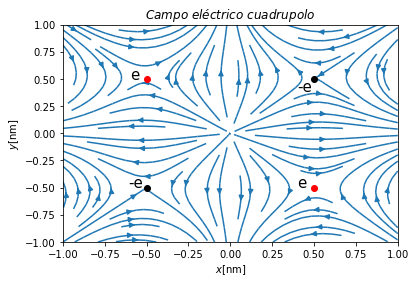

In [14]:

with PdfPages('cargas.pdf') as pdf:
    fig,axes = plt.subplots(1)
    plt.setp(axes,xticks=[0,25,50,75,99],xticklabels=[-1.00,-0.50,0.00,0.50,1.00],yticks=[0,25,50,75,99],yticklabels=[1.00,0.50,0.00,-0.50,-1.00])
    plt.imshow(potencial)
    plt.title('$Potencial\ Cuadrupolo$')
    plt.xlabel('$x$[nm]')
    plt.ylabel('$y$[nm]')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('[V]',rotation=0)
    pdf.savefig()
    plt.close()
    
    plt.streamplot(posx,posy,CampoX,CampoY)
    plt.plot([-0.5, 0.5],[0.5, -0.5],'or')
    plt.plot([-0.5, 0.5],[-0.5, 0.5],'ok')
    plt.text(-0.6,0.5,'e',fontsize=15)
    plt.text(0.4,0.39,'-e',fontsize=15)
    plt.text(-0.61,-0.5,'-e',fontsize=15)
    plt.text(0.4,-0.5,'e',fontsize=15)
    plt.title(u'$Campo\ eléctrico\ cuadrupolo$')
    plt.xlabel('$x$[nm]')
    plt.ylabel('$y$[nm]')
    pdf.savefig()
